# 数据清洗、预处理和可视化

## 说明
在第三次作业中爬取了北京市奶茶店信息，在第四次作用中使用 CartoDB 平台做了可视化。通过地图的可视化，发现一些数据的经纬度异常，以及数据中混入了一些非奶茶店的数据。在本次作业中，将对数据进行一些清洗及预处理，以及以可视化的方式展示数据中的一些信息。

## 数据清洗及预处理

### 读取数据，获取基本信息

In [27]:
import pandas as pd

# 读取数据
dianping_data_path = "../visualization/dianping.csv"
dianping_df = pd.read_csv(dianping_data_path)

# 查看数据的格式有没有正确读取
print(dianping_df.dtypes)

# 查看数据基本统计信息
dianping_df.describe()

shop_name      object
address        object
mean_price      int64
review_num      int64
takeaway         bool
longitude     float64
latitude      float64
dtype: object


,mean_price,review_num,longitude,latitude
count,737.000000,737.000000,737.000000,737.000000
mean,20.839891,569.983718,116.363293,39.825595
std,12.955458,1171.593420,1.452543,1.343609
min,-1.000000,1.000000,83.267022,24.146723
25%,15.000000,104.000000,116.357462,39.910159
50%,18.000000,235.000000,116.413384,39.926375
75%,23.000000,510.000000,116.484359,39.986408
max,136.000000,12061.000000,121.385989,43.435927


In [28]:
# 查看前几条数据
dianping_df.head()

,shop_name,address,mean_price,review_num,takeaway,longitude,latitude
0,Dont Yell At Me不要对我尖叫日常茶间,建式春91号院7号楼玉下一层B108单元,22,618,True,116.796168,40.605732
1,RICHTEA富茶牌,北京市朝阳区阜安东春望京SOHOT3底商3116,21,175,True,116.486866,40.002246
2,cococean椰子水(那里花园店),三里屯北街81号那里花园D109,44,2072,True,116.461465,39.941935
3,1點點(中关村店),中关村大街20号,17,359,True,116.323687,39.988103
4,逗葉Doyatee(望京店),广顺北大街望京西园二区京电底商综合楼1-1层008,55,814,True,116.478232,40.010236


一共有 737 条数据，其中 `mean_price` `review_num` `longitude` `latitude` 为数值类型。

### 数据清洗与预处理

In [29]:
# 查看数据有无缺失值
dianping_df.isnull().any()

shop_name     False
address       False
mean_price    False
review_num    False
takeaway      False
longitude     False
latitude      False
dtype: bool

数据中并无缺失值，但是在爬取数据的时候，对于不含 `mean_price` 信息的店铺，是以 -1 填充，因此需要过滤掉 `mean_price < 0` 的行

In [30]:
dianping_df = dianping_df[dianping_df['mean_price'] > 0]
dianping_df.describe()

,mean_price,review_num,longitude,latitude
count,707.000000,707.000000,707.000000,707.000000
mean,21.766620,593.782178,116.360257,39.820807
std,12.403537,1190.387926,1.482816,1.371516
min,6.000000,13.000000,83.267022,24.146723
25%,15.000000,117.000000,116.356473,39.908998
50%,18.000000,253.000000,116.414456,39.926375
75%,23.000000,524.000000,116.484517,39.986432
max,136.000000,12061.000000,121.385989,43.435927


处理完后剩余 707 条数据。

在第四周作业中通过地图可视化注意到一些数据点的坐标并不在北京的范围内，可能是百度地图返回的结果有误，需要过滤掉这部分数据。

In [31]:
selected_rows = (dianping_df['longitude'] <= 117.4) & (dianping_df['longitude'] >= 115.7) & (dianping_df['latitude'] >= 39.4) & (dianping_df['latitude'] <= 41.6)
dianping_df = dianping_df[selected_rows]
dianping_df.describe()

,mean_price,review_num,longitude,latitude
count,699.000000,699.000000,699.000000,699.000000
mean,21.798283,597.497854,116.428940,39.949738
std,12.462928,1196.306877,0.133985,0.111719
min,6.000000,13.000000,115.979791,39.671635
25%,15.000000,118.500000,116.357980,39.910524
50%,18.000000,255.000000,116.414456,39.927092
75%,23.000000,525.000000,116.483730,39.986534
max,136.000000,12061.000000,117.254453,40.669329


In [32]:
dianping_df[dianping_df['review_num'] < 30]

,shop_name,address,mean_price,review_num,takeaway,longitude,latitude
55,喜茶(浦项中心GO店),望京东园四区13号楼-4指33层101的一层101单元,31,24,True,116.492666,40.006506
57,N&B FRUIT·咖啡·奶茶,悦秀春通厦公园99一楼,18,28,True,116.413384,39.910925
62,嗨菓,北京市朝阳区朝阳南街悠唐购物中心四层,19,13,False,116.445941,39.927722
155,茶颜观色(西铁营万达店),西铁营中春1号院1号楼万达广场3层3018A,19,23,False,116.357462,39.865250
382,本宫的茶(西单大悦城店),西城区西单大悦城5楼,19,19,False,116.379299,39.916967
386,芒果很黄(天通苑华联店),立汤春华联天通苑购物中心B1层,26,18,True,116.421152,40.072676
398,一点点(和平东桥店),樱花园东街14号底商1号商铺,15,27,True,116.431241,39.980679
411,1點點(翠微印象城店),翠微春印象城负1层,14,18,True,116.309846,39.918434
461,1點點(六道口店),清华东春25号,16,19,True,116.413384,39.910925
493,本宫的茶(昌平悦荟万科店),南九春10号院1号楼悦荟万科广场玉下一层B1013,18,24,False,116.245694,40.218167


看了一下评论数较少的店铺，原本以为评论数较少的店铺会是一些比较生僻的店，可以过滤掉，但看了一下有 “1点点” 这样很常见的店铺，可能是开的时间比较短，所以打算不过滤这一项了。

过滤后剩余 699 条数据，注意到 `mean_price` 一列，最大值为 136，感觉不太符合奶茶店的价格。这一列 75% 的值是在 23 以下的。我在大众点评上查了一下比较贵的“喜茶”“奈雪の茶”的人均在 30-40 的区间内，感觉上价格超出 40 的店铺会比较罕见，所以把 `mean_price > 40` 的店铺信息打印出来看一下。

In [33]:
pd.set_option('display.max_rows', 200)
dianping_df[dianping_df['mean_price'] > 40]

,shop_name,address,mean_price,review_num,takeaway,longitude,latitude
2,cococean椰子水(那里花园店),三里屯北街81号那里花园D109,44,2072,True,116.461465,39.941935
4,逗葉Doyatee(望京店),广顺北大街望京西园二区京电底商综合楼1-1层008,55,814,True,116.478232,40.010236
9,品质伊骊(人大创始店),小南庄110号,84,5861,True,116.312522,39.970230
13,椒鸣椒麻小馆·浩瀚星空(华宇店),中关村南大街2号华宇购物中心四层,83,3750,True,116.752423,40.142745
17,小龙坎老火锅(府前西街店),府前西街10号金百万底商,124,1597,True,117.115508,40.146416
20,徽韵人家·传承正宗徽菜(东大桥店),中纺街5号22幢1至3层02层、03层,109,632,True,116.445780,39.933834
33,煮葉(APM店),王府湾大街138号北京apmB区B1层107,44,1781,True,116.512885,39.847469
48,煮葉(国贸商城店),建式门阳大街1号式贸商城北区玉下二层3B215,51,271,True,116.465880,39.915670
54,Blueglass Yogurt 阿秋拉尕酸奶(颐堤港店),酒仙桥春18号颐堤较1层176号商铺,45,1755,True,116.496975,39.994358
66,JF皇家茶馆(国贸商城店),建式门阳大街1号式贸商场玉下一层A座北区3B1-1铺位,136,1311,True,116.413384,39.910925


一共有 28 条数据，注意到这些数据中乱入了“小龙坎老火锅(府前西街店)”这样的店铺，这些店铺的人均基本都在 100 左右。

这一部分数据中，既有人均很高的奶茶店 （“JF皇家茶馆(国贸商城店)”：136，在大众点评看是一家英式下午茶），也有人均较低的吃饭的店（春宵面馆：45），我没有想到很好的方法来过滤。因为这一部分数据不是很多，所以手动将看起来不像奶茶店的店铺找出来了。

In [34]:
filtered_shop_names = ["品质伊骊", "椒鸣椒麻小馆", "小龙坎老火锅", "徽韵人家", "春宵面馆", "邬智雅娜", "小钦岛渔歌海鲜水饺"]
pattern = "|".join(filtered_shop_names)
dianping_df = dianping_df[~dianping_df.shop_name.str.contains(pattern)]
dianping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 736
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   shop_name   692 non-null    object 
 1   address     692 non-null    object 
 2   mean_price  692 non-null    int64  
 3   review_num  692 non-null    int64  
 4   takeaway    692 non-null    bool   
 5   longitude   692 non-null    float64
 6   latitude    692 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 38.5+ KB


过滤后剩余 692 条数据。

## 可视化

可视化的部分我使用了 `seaborn` 和 `wordcloud`。

首先可视化 `mean_price` 的分布情况。

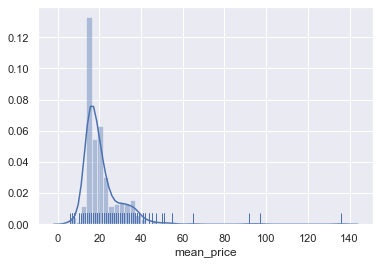

In [19]:
import seaborn as sns
sns.set(color_codes=True)
mean_price_plot = sns.distplot(dianping_df['mean_price'], kde=True, rug=True)
mean_price_plot
# save
mean_price_plot.figure.savefig("figures/mean_price.png")

可以注意到 `mean_price` 比较集中在 20 左右。从图中可以看到大部分数据集中在 [5, 40] 的区间内，在大于 40 的区间内仅有少量的数据分布，与数据预处理部分的观察情况一致。

接下来可视化奶茶店是否可以外卖的情况，从图中可以看到，绝大多数奶茶店是可以外卖的。

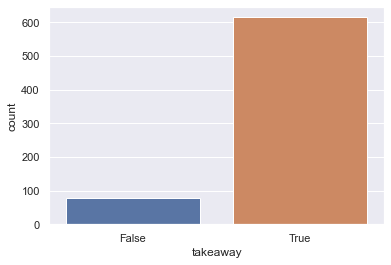

In [20]:
takeaway_plot = sns.countplot(x='takeaway', data=dianping_df)
takeaway_plot
# save
takeaway_plot.figure.savefig("figures/takeaway.png")

在下图中可以看到，可以外送的奶茶店的分布情况和所有奶茶店的分布情况基本是一致的，可以外送的分布与不可外送的分布走势也比较接近，只不过不可外送的分布更平缓一些，可能是因为这一部分数据较少的缘故。

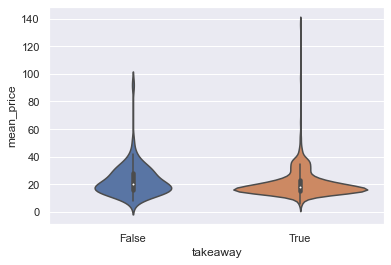

In [21]:
takeaway_mean_price_plot = sns.violinplot(x='takeaway', y='mean_price', data=dianping_df)
takeaway_mean_price_plot
# save
takeaway_mean_price_plot.figure.savefig("figures/takeaway_mean_price.png")

最后，以评论数作为奶茶店热度的参考，以词云的形式可视化爬取到奶茶店的热度。

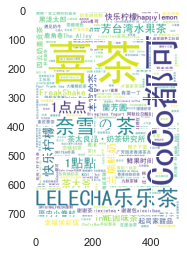

In [26]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# 读取店铺名称和评论数两列
shop_names = dianping_df.shop_name
review_nums = dianping_df.review_num
# 计算热度
review_dict = {}
for shop_name, review_num in zip(shop_names, review_nums):
    # 注意到店铺名称的形式是：名称（简略地址），这里将相同名称的店铺的评论数集合在一起
    shop_name = shop_name.split('(')[0]
    review_dict[shop_name] = review_dict.get(shop_name, 0) + review_num

    # 可视化
wc = WordCloud(
        font_path="simhei.ttf", # 为了正常显示中文，需要指定字体文件
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 500,  # 设置图片的宽度
        height= 750,  # 设置图片的高度
#         margin= 10  # 设置图片的边缘
    )
wc.generate_from_frequencies(review_dict)  # 从字典生成词云
plt.imshow(wc) 
wc.to_file("figures/shop_cloud.png")

词云图中醒目的可以看到 “喜茶” “CoCo” “乐乐茶” “一点点” 这些日常经常购买的奶茶店。